In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import time

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/PRAK DATA MINING/Pertemuan 4/laptop_data.csv')
df

Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1     127.677940          Intel Core i5     0    0     Intel      Mac  
2     141.211998          Intel Core i5     0  256     Intel   Others  
3     220.534624          Intel Core i7     0  512       AMD      Mac  
4     226.983005          Intel Core i5     0  256     Intel      Mac  
...          ...                    ...   ...  ...       ...      ...  
1268  100.454670          Intel Core i7   500    0    Nvidia  Windows  
1269  157.350512          Intel Core i7     0  128     Intel  Windows  
1270  276.053530          Intel Core i7     0  512     Intel  Windows  
1271  111.935204  Other Intel Processor     0    0     Intel  Windows  
1272  100.454670          Intel Core i7  1000    0       AMD  Windows  

[1273 rows x 13 columns]

In [ ]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [ ]:
z_score = stats.zscore(df['Price'])
threshold=2
data_clean = df[(z_score < threshold) & (z_score > -threshold)]
data_clean

Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1266    Dell            Notebook    8    2.30  10.667632            0    0   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi      Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005  Intel Core i5     0  128     Intel      Mac  
1     127.677940  Intel Core i5     0    0     Intel      Mac  
2     141.211998  Intel Core i5     0  256     Intel   Others  
3     220.534624  Intel Core i7     0  512       AMD      Mac  
4     226.983005  Intel Core i5     0  256     Intel      Mac  
...          ...            ...   ...  ...       ...      ...  
1266  100.454670  Intel Core i7  1000    0       AMD   Others  
1268  100.454670  Intel Core i7   500    0    Nvidia  Windows  
1269  157.350512  Intel Core i7     0  128     Intel  Windows  
1270  276.053530  Intel Core i7     0  512     Intel  Windows  
1272  100.454670  Intel Core i7  1000    0       AMD  Windows  

[1230 rows x 13 columns]

In [ ]:
data_clean.duplicated().sum()

1

In [ ]:
df = data_clean.drop_duplicates()
df

Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1266    Dell            Notebook    8    2.30  10.667632            0    0   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi      Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005  Intel Core i5     0  128     Intel      Mac  
1     127.677940  Intel Core i5     0    0     Intel      Mac  
2     141.211998  Intel Core i5     0  256     Intel   Others  
3     220.534624  Intel Core i7     0  512       AMD      Mac  
4     226.983005  Intel Core i5     0  256     Intel      Mac  
...          ...            ...   ...  ...       ...      ...  
1266  100.454670  Intel Core i7  1000    0       AMD   Others  
1268  100.454670  Intel Core i7   500    0    Nvidia  Windows  
1269  157.350512  Intel Core i7     0  128     Intel  Windows  
1270  276.053530  Intel Core i7     0  512     Intel  Windows  
1272  100.454670  Intel Core i7  1000    0       AMD  Windows  

[1229 rows x 13 columns]

In [ ]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Chuwi', 'Mediacom',
       'Google', 'Fujitsu', 'Samsung', 'Razer', 'LG'], dtype=object)

In [ ]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [ ]:
df['Cpu_brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [ ]:
df['Gpu_brand'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [ ]:
df['Os'].unique()

array(['Mac', 'Others', 'Windows'], dtype=object)

In [ ]:
d1 = pd.get_dummies(df['Company'])
d1

Acer  Apple  Asus  Chuwi  Dell  Fujitsu  Google  HP  Huawei  LG  Lenovo  \
0        0      1     0      0     0        0       0   0       0   0       0   
1        0      1     0      0     0        0       0   0       0   0       0   
2        0      0     0      0     0        0       0   1       0   0       0   
3        0      1     0      0     0        0       0   0       0   0       0   
4        0      1     0      0     0        0       0   0       0   0       0   
...    ...    ...   ...    ...   ...      ...     ...  ..     ...  ..     ...   
1266     0      0     0      0     1        0       0   0       0   0       0   
1268     0      0     1      0     0        0       0   0       0   0       0   
1269     0      0     0      0     0        0       0   0       0   0       1   
1270     0      0     0      0     0        0       0   0       0   0       1   
1272     0      0     0      0     0        0       0   1       0   0       0   

      MSI  Mediacom  Microsoft  Razer  Samsung  Toshiba  Xiaomi  
0       0         0          0      0        0        0       0  
1       0         0          0      0        0        0       0  
2       0         0          0      0        0        0       0  
3       0         0          0      0        0        0       0  
4       0         0          0      0        0        0       0  
...   ...       ...        ...    ...      ...      ...     ...  
1266    0         0          0      0        0        0       0  
1268    0         0          0      0        0        0       0  
1269    0         0          0      0        0        0       0  
1270    0         0          0      0        0        0       0  
1272    0         0          0      0        0        0       0  

[1229 rows x 18 columns]

In [ ]:
d2 = pd.get_dummies(df['TypeName'])
d2

2 in 1 Convertible  Gaming  Netbook  Notebook  Ultrabook  Workstation
0                      0       0        0         0          1            0
1                      0       0        0         0          1            0
2                      0       0        0         1          0            0
3                      0       0        0         0          1            0
4                      0       0        0         0          1            0
...                  ...     ...      ...       ...        ...          ...
1266                   0       0        0         1          0            0
1268                   0       0        0         1          0            0
1269                   1       0        0         0          0            0
1270                   1       0        0         0          0            0
1272                   0       0        0         1          0            0

[1229 rows x 6 columns]

In [ ]:
d3 = pd.get_dummies(df['Cpu_brand'])
d3

AMD Processor  Intel Core i3  Intel Core i5  Intel Core i7  \
0                 0              0              1              0   
1                 0              0              1              0   
2                 0              0              1              0   
3                 0              0              0              1   
4                 0              0              1              0   
...             ...            ...            ...            ...   
1266              0              0              0              1   
1268              0              0              0              1   
1269              0              0              0              1   
1270              0              0              0              1   
1272              0              0              0              1   

      Other Intel Processor  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
1266                      0  
1268                      0  
1269                      0  
1270                      0  
1272                      0  

[1229 rows x 5 columns]

In [ ]:
d4 = pd.get_dummies(df['Gpu_brand'])
d4

AMD  Intel  Nvidia
0       0      1       0
1       0      1       0
2       0      1       0
3       1      0       0
4       0      1       0
...   ...    ...     ...
1266    1      0       0
1268    0      0       1
1269    0      1       0
1270    0      1       0
1272    1      0       0

[1229 rows x 3 columns]

In [ ]:
d5 = pd.get_dummies(df['Os'])
d5

Mac  Others  Windows
0       1       0        0
1       1       0        0
2       0       1        0
3       1       0        0
4       1       0        0
...   ...     ...      ...
1266    0       1        0
1268    0       0        1
1269    0       0        1
1270    0       0        1
1272    0       0        1

[1229 rows x 3 columns]

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [ ]:
ram = df['Ram']
weight = df['Weight']
price = df['Price']
touchscreen = df['TouchScreen']
ips = df['Ips']
ppi = df['Ppi']
hdd = df['HDD']
ssd = df['SSD']

In [ ]:
hasil = pd.concat([d1,d2,ram,weight,price,touchscreen,ips,ppi,d3,hdd,ssd,d4,d5],axis = 'columns')
hasil

Acer  Apple  Asus  Chuwi  Dell  Fujitsu  Google  HP  Huawei  LG  ...  \
0        0      1     0      0     0        0       0   0       0   0  ...   
1        0      1     0      0     0        0       0   0       0   0  ...   
2        0      0     0      0     0        0       0   1       0   0  ...   
3        0      1     0      0     0        0       0   0       0   0  ...   
4        0      1     0      0     0        0       0   0       0   0  ...   
...    ...    ...   ...    ...   ...      ...     ...  ..     ...  ..  ...   
1266     0      0     0      0     1        0       0   0       0   0  ...   
1268     0      0     1      0     0        0       0   0       0   0  ...   
1269     0      0     0      0     0        0       0   0       0   0  ...   
1270     0      0     0      0     0        0       0   0       0   0  ...   
1272     0      0     0      0     0        0       0   1       0   0  ...   

      Intel Core i7  Other Intel Processor   HDD  SSD  AMD  Intel  Nvidia  \
0                 0                      0     0  128    0      1       0   
1                 0                      0     0    0    0      1       0   
2                 0                      0     0  256    0      1       0   
3                 1                      0     0  512    1      0       0   
4                 0                      0     0  256    0      1       0   
...             ...                    ...   ...  ...  ...    ...     ...   
1266              1                      0  1000    0    1      0       0   
1268              1                      0   500    0    0      0       1   
1269              1                      0     0  128    0      1       0   
1270              1                      0     0  512    0      1       0   
1272              1                      0  1000    0    1      0       0   

      Mac  Others  Windows  
0       1       0        0  
1       1       0        0  
2       0       1        0  
3       1       0        0  
4       1       0        0  
...   ...     ...      ...  
1266    0       1        0  
1268    0       0        1  
1269    0       0        1  
1270    0       0        1  
1272    0       0        1  

[1229 rows x 43 columns]

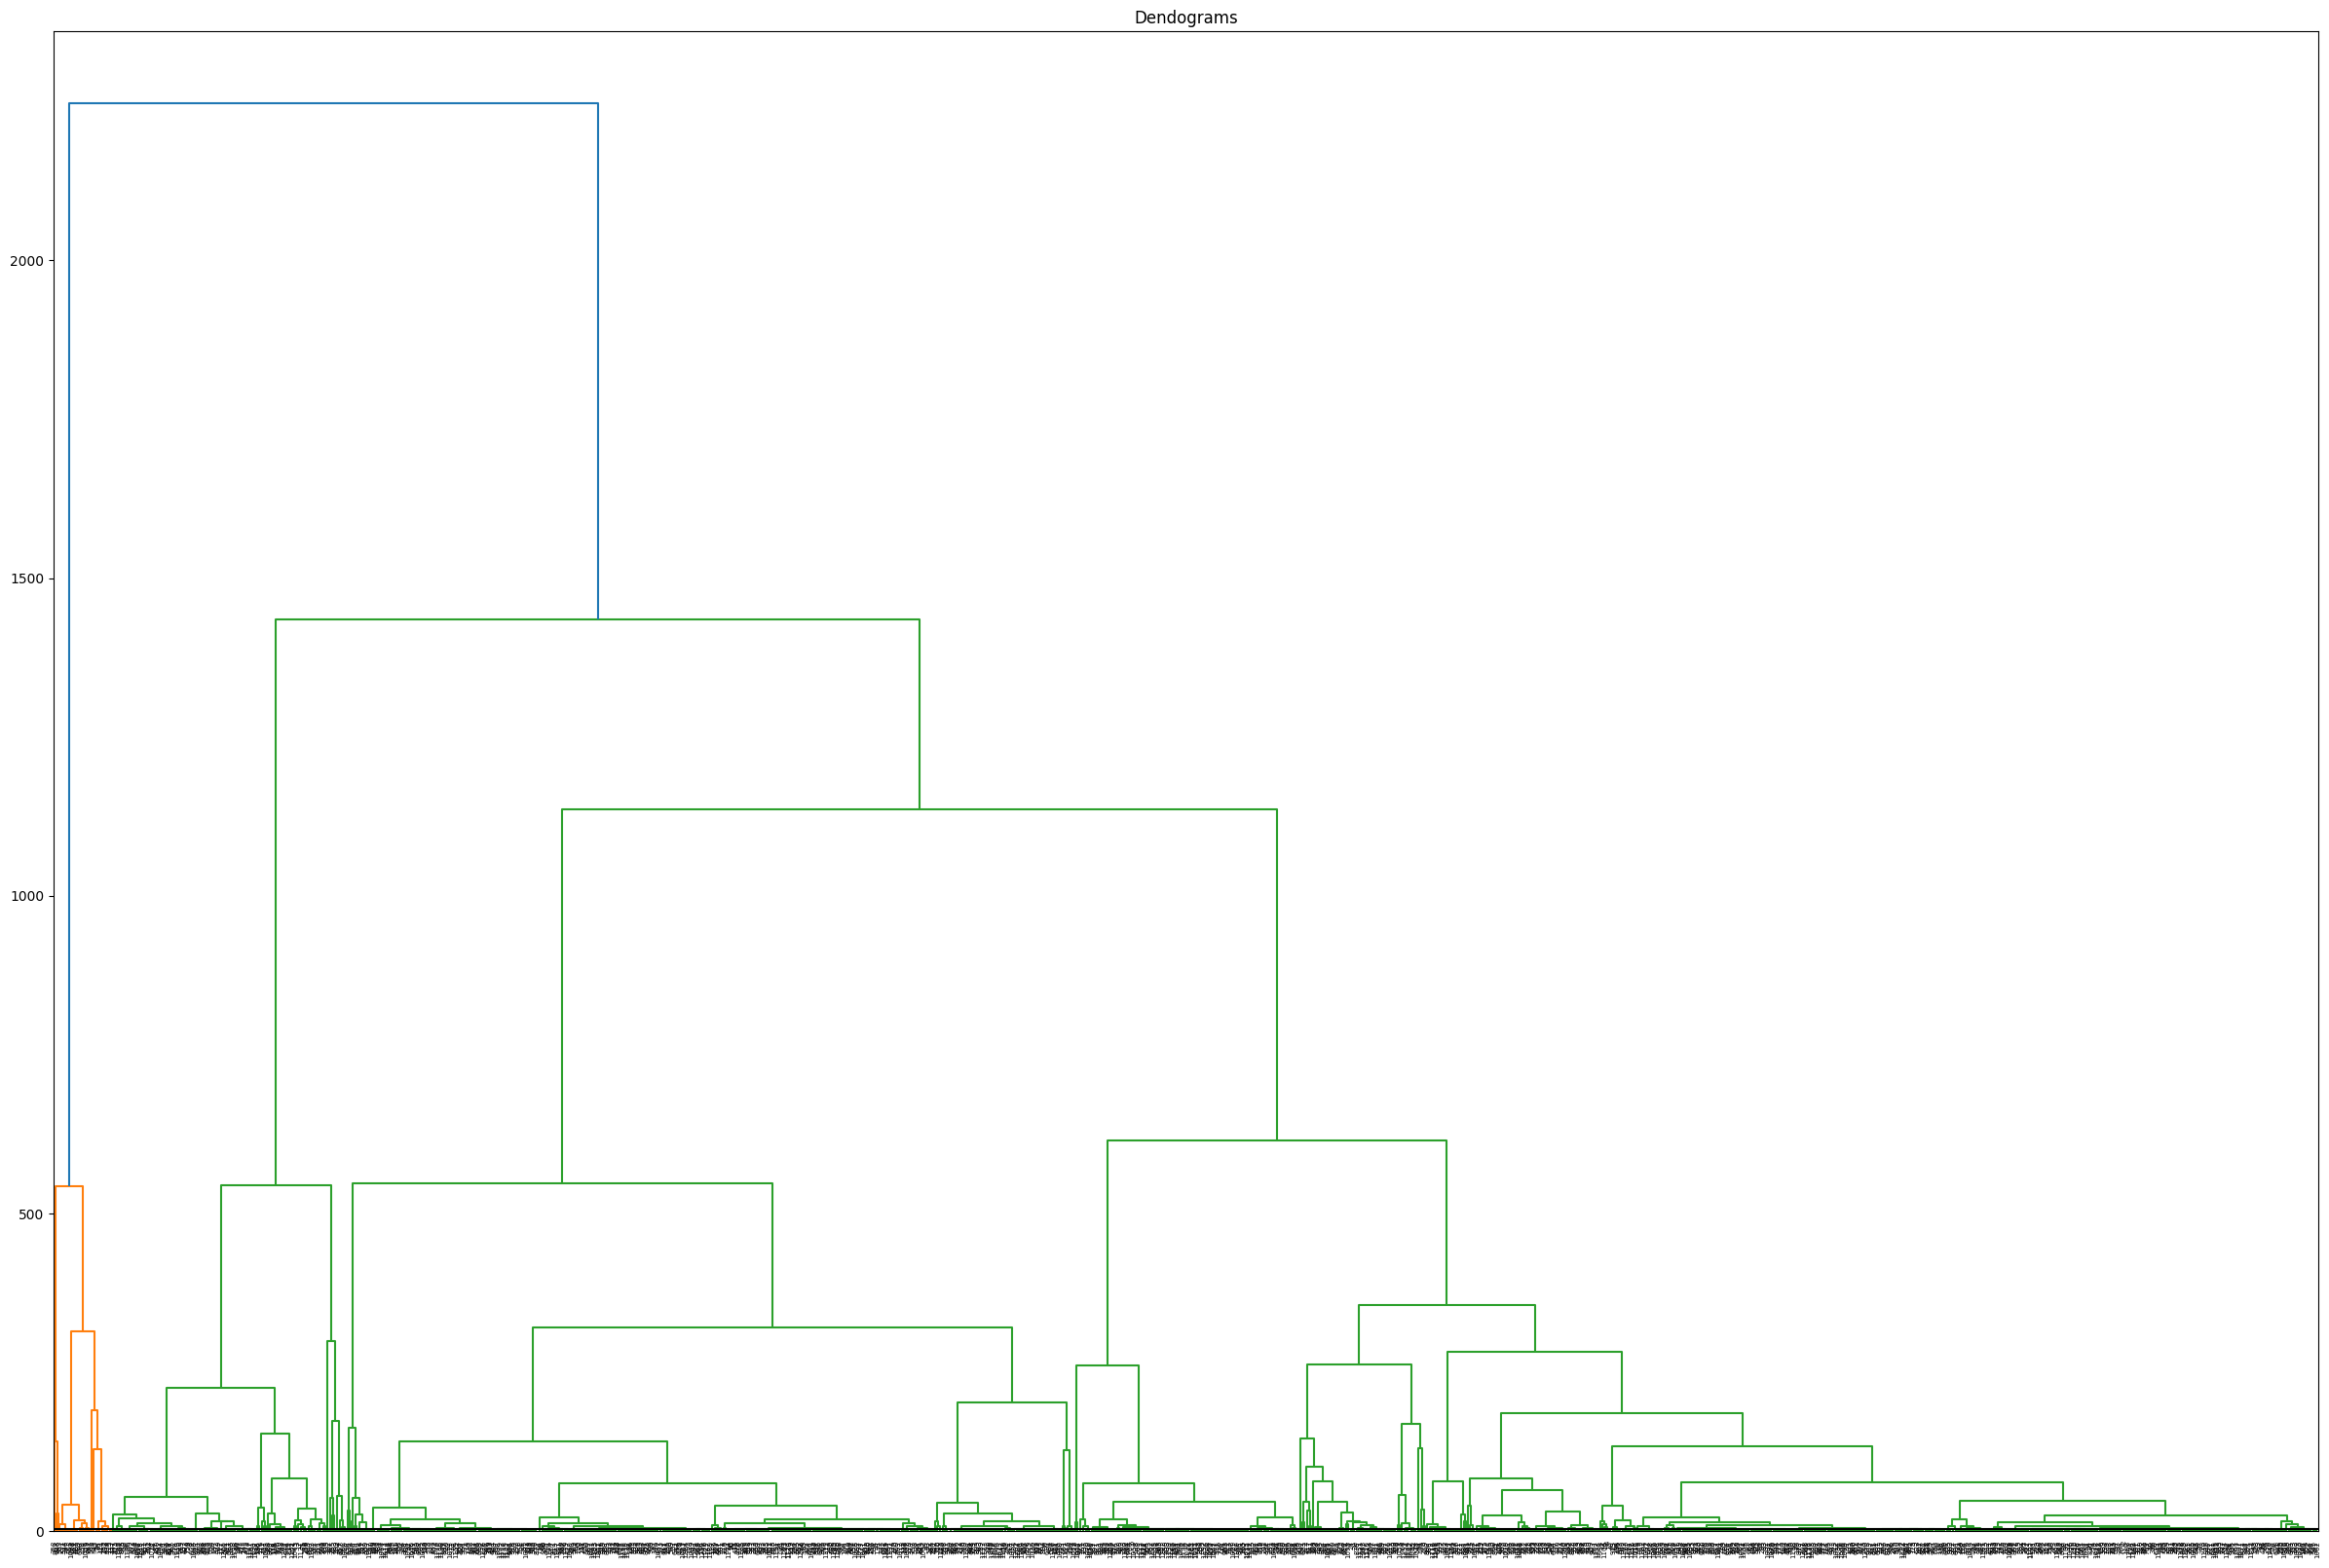

In [ ]:
plt.figure(figsize=(30, 20))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(hasil, method='complete'))
plt.axhline(y=4, c='k')
plt.savefig('plt.png', format='png', bbox_inches='tight')
#plt.savefig('chart.png',figsize=(300, 300),dpi=300)

In [ ]:
st = time.time()
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster_result = clustering.fit_predict(hasil)
clustering.fit_predict(hasil)

et = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.11398887634277344 seconds


In [ ]:
print(f'Silhouette Score : {silhouette_score(hasil, cluster_result)}')

Silhouette Score : 0.609966478363384


In [ ]:
df['cluster'] = cluster_result
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


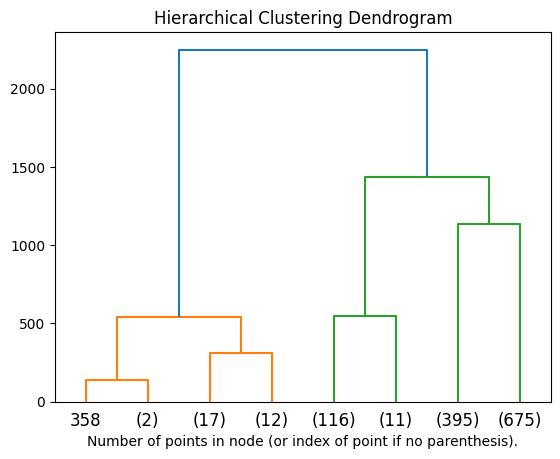

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
X = hasil

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='complete')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
df['cluster'].value_counts()

0    1197
1      32
Name: cluster, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
c_result = kmeans.fit_predict(hasil)
kmeans.fit_predict(hasil)

print(f'Silhouette Score : {silhouette_score(hasil, c_result)}')

Silhouette Score : 0.7245883913704584


In [ ]:
min_price = np.min(price)
max_price = np.max(price)
norm_price = price-min_price/max_price-min_price
norm_price

0       0.788359
1       0.389382
2      -0.057465
3       1.427080
4       1.085705
          ...   
1266    0.280237
1268    0.167861
1269    0.046504
1270    0.900719
1272    0.226733
Name: Price, Length: 1229, dtype: float64

In [ ]:
hasil_n = pd.concat([d1,d2,ram,weight,norm_price,touchscreen,ips,ppi,d3,hdd,ssd,d4,d5],axis = 'columns')
hasil_n

Acer  Apple  Asus  Chuwi  Dell  Fujitsu  Google  HP  Huawei  LG  ...  \
0        0      1     0      0     0        0       0   0       0   0  ...   
1        0      1     0      0     0        0       0   0       0   0  ...   
2        0      0     0      0     0        0       0   1       0   0  ...   
3        0      1     0      0     0        0       0   0       0   0  ...   
4        0      1     0      0     0        0       0   0       0   0  ...   
...    ...    ...   ...    ...   ...      ...     ...  ..     ...  ..  ...   
1266     0      0     0      0     1        0       0   0       0   0  ...   
1268     0      0     1      0     0        0       0   0       0   0  ...   
1269     0      0     0      0     0        0       0   0       0   0  ...   
1270     0      0     0      0     0        0       0   0       0   0  ...   
1272     0      0     0      0     0        0       0   1       0   0  ...   

      Intel Core i7  Other Intel Processor   HDD  SSD  AMD  Intel  Nvidia  \
0                 0                      0     0  128    0      1       0   
1                 0                      0     0    0    0      1       0   
2                 0                      0     0  256    0      1       0   
3                 1                      0     0  512    1      0       0   
4                 0                      0     0  256    0      1       0   
...             ...                    ...   ...  ...  ...    ...     ...   
1266              1                      0  1000    0    1      0       0   
1268              1                      0   500    0    0      0       1   
1269              1                      0     0  128    0      1       0   
1270              1                      0     0  512    0      1       0   
1272              1                      0  1000    0    1      0       0   

      Mac  Others  Windows  
0       1       0        0  
1       1       0        0  
2       0       1        0  
3       1       0        0  
4       1       0        0  
...   ...     ...      ...  
1266    0       1        0  
1268    0       0        1  
1269    0       0        1  
1270    0       0        1  
1272    0       0        1  

[1229 rows x 43 columns]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
c_result = kmeans.fit_predict(hasil_n)
kmeans.fit_predict(hasil_n)

print(f'Silhouette Score : {silhouette_score(hasil, c_result)}')

Silhouette Score : 0.7245883913704584
